In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
comments = pd.read_csv('Comments.csv')

In [3]:
pwd

'C:\\Users\\v536256\\Python'

In [4]:
comments.head(2)

,COMMENTS
0,THIS ORDER IS TO ENABLE THE DCAR ONLY. THIS IS...
1,This is just a change order for an Existing Ma...


In [5]:
comments['COMMENTS'][0].lower().split()

['this',
 'order',
 'is',
 'to',
 'enable',
 'the',
 'dcar',
 'only.',
 'this',
 'is',
 'vzb',
 'expedited,',
 'please',
 'complete',
 'asap.']

In [6]:
import nltk

In [7]:
#nltk.download_shell()

In [8]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re

In [9]:
#stopwords.words('english')

In [10]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
c1 = comments['COMMENTS'][1]
no_punc = [ch for ch in c1 if ch not in string.punctuation]
print(''.join(no_punc))

This is just a change order for an Existing Managed Circuit BCBK994S0001
Changes to apply Add ETM Select and ensure PE Stats is enabled Should you have questions please reach out to OM Bernice Pangan  Bernicepanganverizoncom OM Supervisor Melissa Villabruza  Melissavillabruzaverizoncom 


In [37]:
def CleanUp(sentence):
    #no_punc = [ch for ch in sentence if ch not in string.punctuation]
    #no_punc = [ch if ch not in string.punctuation else ' ' for ch in sentence]
    no_punc = [ch if (ch not in string.punctuation and ch.isdigit()==False) else ' ' for ch in sentence]
    no_punc = re.sub(' +',' ',''.join(no_punc).lower().strip())
    no_stop = [word for word in no_punc.split() if (word not in stopwords.words('english') and word.isdigit()==False)]
    ps = PorterStemmer()
    stem_word = [ps.stem(word) for word in no_stop]
    return(' '.join(stem_word))


In [235]:
[word for word in 'fe 11 dfa21 as 343 fa  fea sa!'.split() if (word not in stopwords.words('english') and word.isdigit()==False)]


['fe', 'dfa21', 'fa', 'fea', 'sa!']

In [13]:
re.sub(' +', ' ' , ''.join([ch if ch not in string.punctuation else ' ' for ch in 'ASDL/DES D SQS LE: ED QA:ES']))

'ASDL DES D SQS LE ED QA ES'

In [38]:
comments_final = comments['COMMENTS'].apply(CleanUp)
comments_final.head()

0            order enabl dcar vzb expedit complet asap
1    chang order exist manag circuit bcbk chang app...
2    wf upgrad p bcbk rw pip mlppp k gc crdd foc bp...
3                                                frame
4    wf bpdd upgrad p bcblbc x bcblbc x pip mlppp k...
Name: COMMENTS, dtype: object

In [14]:
comments_final = comments['COMMENTS'].apply(CleanUp)
comments_final.head()

0            order enabl dcar vzb expedit complet asap
1    chang order exist manag circuit bcbk994s0001 c...
2    wf upgrad p2139095 bcbk9rw40001 6m pip mlppp 1...
3                                                frame
4    wf bpdd upgrad p2154453 bcblbc5x0001 bcblbc5x0...
Name: COMMENTS, dtype: object

In [39]:
comments_final[2]

'wf upgrad p bcbk rw pip mlppp k gc crdd foc bpdd set mpl pop dnj pe dnj e dnj e dnj e dnjge dnjge dnjge dnjge ce ip pe ip vpn wellsfargo west vzb dlci qo g qo etm md timer sc rc mc rcvr loc n tower rd aurora co unit state dmarc bldg main flr st rm telco mpoe btn lcon leugim borr guerrero nuria rivera call dispatch work order requir see lcon access cu hcu call stephani hopson site deliveri requir notifi leo nuria number prior arriv onsit'

In [16]:
comments['COMMENTS'][2]

'9397989 WF 17-14147-1, UPGRADE P2139095 (BCBK9RW40001 - 0002) to 6M PIP MLPPP 1808K GC. CRDD & FOC for BPDD. Set MPLS POP to DNJ and PE to DNJ3E03 or DNJ9E01 or DNJ9E02 or DNJGE01 or DNJGE02 or DNJGE03 or DNJGE08. CE IP 165.126.69.90 PE IP 165.126.69.89. VPN WellsFargo-West-VzB-1. AS 64951. DLCI 111. QOS G10. QOS ETM. MD5 Y. TIMER 15/45. SC Y. RC Y. MC Y RCVR. LOC: 3521 N TOWER RD, AURORA, CO 80011-3509 United States. DMARC is BLDG MAIN FLR 1ST RM TELCO MPOE, BTN 303-373-8601. LCON: LEUGIM BORRES GUERRERO 303/373-8610 or NURIA RIVERA 303/373-8600. Please call before dispatch, work order required, see lcon for access. For CUS / HCUS, CALL STEPHANIE HOPSON 704/427-7223.**Site Delivery Requirements:Please notify Leo or Nuria at above number prior to arriving onsite.'

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [41]:
cv = CountVectorizer()

In [42]:
comments_tf = cv.fit_transform(comments_final)

In [43]:
comments_tf

<571x2213 sparse matrix of type '<class 'numpy.int64'>'
	with 14440 stored elements in Compressed Sparse Row format>

In [44]:
comments_tf.nnz

14440

In [45]:
comments_final[100]

'order mto'

In [46]:
print(comments_tf[100])

  (0, 1299)	1
  (0, 1435)	1


In [47]:
tfidf = TfidfTransformer()

In [48]:
comments_tfidf = tfidf.fit_transform(comments_tf)

In [49]:
comments_tfidf

<571x2213 sparse matrix of type '<class 'numpy.float64'>'
	with 14440 stored elements in Compressed Sparse Row format>

In [50]:
print(comments_tfidf[100])

  (0, 1435)	0.414655107146
  (0, 1299)	0.909978649265


In [51]:
cv.vocabulary_

{'order': 1435,
 'enabl': 661,
 'dcar': 516,
 'vzb': 2108,
 'expedit': 708,
 'complet': 440,
 'asap': 100,
 'chang': 376,
 'exist': 705,
 'manag': 1158,
 'circuit': 397,
 'bcbk': 170,
 'appli': 86,
 'add': 20,
 'etm': 693,
 'select': 1774,
 'ensur': 669,
 'pe': 1487,
 'stat': 1866,
 'question': 1602,
 'reach': 1624,
 'om': 1418,
 'bernic': 228,
 'pangan': 1460,
 'com': 431,
 'supervisor': 1895,
 'melissa': 1225,
 'villabruza': 2076,
 'wf': 2142,
 'upgrad': 2035,
 'rw': 1726,
 'pip': 1511,
 'mlppp': 1258,
 'gc': 794,
 'crdd': 479,
 'foc': 751,
 'bpdd': 266,
 'set': 1785,
 'mpl': 1289,
 'pop': 1541,
 'dnj': 570,
 'dnjge': 571,
 'ce': 362,
 'ip': 973,
 'vpn': 2091,
 'wellsfargo': 2139,
 'west': 2140,
 'dlci': 564,
 'qo': 1598,
 'md': 1199,
 'timer': 1975,
 'sc': 1752,
 'rc': 1620,
 'mc': 1193,
 'rcvr': 1621,
 'loc': 1121,
 'tower': 1990,
 'rd': 1622,
 'aurora': 122,
 'co': 424,
 'unit': 2029,
 'state': 1867,
 'dmarc': 565,
 'bldg': 246,
 'main': 1148,
 'flr': 746,
 'st': 1859,
 'rm': 1689

In [52]:
tfidf.idf_[cv.vocabulary_['etm']]

3.4779379804719071

In [53]:
from sklearn.cluster import KMeans

In [54]:
km = KMeans(n_clusters=15)

In [55]:
km.fit_predict(comments_tfidf)

array([ 3,  3,  8,  0,  8,  0,  8,  5,  3, 13,  9,  3, 11, 14, 14,  9,  3,
        9, 12, 13, 13, 13, 11, 12,  5,  5,  3, 10,  3, 14, 12,  0,  1,  1,
        0,  1, 11, 11, 14, 14,  3,  1, 11, 11,  3, 11, 14, 10,  3, 10, 14,
       14, 14, 12, 12, 10, 14,  3, 12,  3,  8,  8,  8,  3,  3, 10,  3,  5,
        5, 10,  3,  3,  3, 10, 13, 13, 13, 10,  9, 11, 11,  6,  6, 13, 13,
        9, 10, 13, 13, 13,  9, 13,  9,  5,  5,  5,  5, 12, 11, 14,  3,  3,
        3,  3,  9,  3,  3,  3, 12, 12, 11,  3,  3,  3, 11,  3, 11, 11, 10,
       10,  1, 13,  1,  1,  1,  1,  1, 12,  3,  3,  5,  5,  6,  6,  9,  4,
        4,  4,  4,  4,  1,  9, 12, 10, 12, 12,  8, 12, 10,  3,  9, 11,  8,
       12,  3,  3, 12,  4,  4,  4,  3, 12, 12,  3, 14, 14, 14, 14, 10,  7,
       12, 12,  3, 10,  4,  4,  3,  4,  4,  4,  3, 11,  3,  3,  3,  3,  5,
       12,  5,  3, 12, 11, 12,  3, 10, 10,  3,  3, 11, 10, 10, 11, 10, 10,
       10, 10, 10, 10,  3, 10,  7, 11, 11, 12,  8, 11,  3, 13, 13, 13,  3,
        3, 13, 13, 13, 13

In [56]:
km.labels_

array([ 3,  3,  8,  0,  8,  0,  8,  5,  3, 13,  9,  3, 11, 14, 14,  9,  3,
        9, 12, 13, 13, 13, 11, 12,  5,  5,  3, 10,  3, 14, 12,  0,  1,  1,
        0,  1, 11, 11, 14, 14,  3,  1, 11, 11,  3, 11, 14, 10,  3, 10, 14,
       14, 14, 12, 12, 10, 14,  3, 12,  3,  8,  8,  8,  3,  3, 10,  3,  5,
        5, 10,  3,  3,  3, 10, 13, 13, 13, 10,  9, 11, 11,  6,  6, 13, 13,
        9, 10, 13, 13, 13,  9, 13,  9,  5,  5,  5,  5, 12, 11, 14,  3,  3,
        3,  3,  9,  3,  3,  3, 12, 12, 11,  3,  3,  3, 11,  3, 11, 11, 10,
       10,  1, 13,  1,  1,  1,  1,  1, 12,  3,  3,  5,  5,  6,  6,  9,  4,
        4,  4,  4,  4,  1,  9, 12, 10, 12, 12,  8, 12, 10,  3,  9, 11,  8,
       12,  3,  3, 12,  4,  4,  4,  3, 12, 12,  3, 14, 14, 14, 14, 10,  7,
       12, 12,  3, 10,  4,  4,  3,  4,  4,  4,  3, 11,  3,  3,  3,  3,  5,
       12,  5,  3, 12, 11, 12,  3, 10, 10,  3,  3, 11, 10, 10, 11, 10, 10,
       10, 10, 10, 10,  3, 10,  7, 11, 11, 12,  8, 11,  3, 13, 13, 13,  3,
        3, 13, 13, 13, 13

In [34]:
km.score

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)>

In [58]:
res = pd.concat([comments['COMMENTS'], comments_final, pd.Series(km.labels_)], axis = 1)
writer = pd.ExcelWriter('C:/Users/v536256/Desktop/End to End Analytics/Cluster_k15_v1.xlsx')
res.to_excel(writer,'Sheet1')
writer.save()

In [112]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [162]:
#word_tokenize('Asking to ask about what he asked')

In [36]:
km.score(comments_tfidf)

-426.8729703622373

In [260]:
k_list = np.arange(1, 71)
score_list = [KMeans(n_clusters=i).fit(comments_tfidf).score(comments_tfidf) for i in np.arange(1,71)]

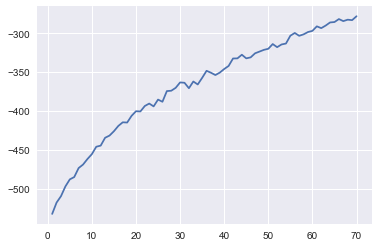

In [261]:
#Elbow
plt.plot(k_list, score_list)  # No elbow :(

In [195]:
km.score()

TypeError: score() missing 1 required positional argument: 'X'